In [1]:
import pickle
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
with open('train_x', 'rb') as file:
    s = pickle.load(file)
z = pickle.loads(s)
with open('train_label', 'rb') as file:
    s = pickle.load(file)
label = pickle.loads(s)

In [18]:
# pictures are labeled manually, 0:night with Aurora, 1:night, 2:dawn/dust, 3:daytime.
# build 3 classfiers, 1. classify pictures into day/night, 2. classify night pictures by aurora or not, and 3. classify into dawn/dust or daytime

# 1.
label[label == "0"] = "0"
label[label == "1"] = "0"
label[label == "2"] = "1"
label[label == "3"] = "1"

#  2.
# label = label[np.logical_or(label == "0", label == "1")] 

# 3.
# label = label[np.logical_or(label == "2", label == "3")] 
# label[label == "2"] = "0"
# label[label == "3"] = "1"

In [298]:
train_x, test_x, train_label, test_label = train_test_split(z, label[:, 1].reshape(-1, 1), test_size=0.1)

In [300]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.lr1=nn.Linear(512,50) 
        self.act=nn.ReLU()
        self.lr2=nn.Linear(50,1) 
        self.sm=nn.Sigmoid()
        
    def forward(self, x):
        x=self.lr1(x)
        x=self.act(x)
        x=self.lr2(x)
        x=self.sm(x)
        return x

In [301]:
model = MLP()
criterion=nn.BCELoss()   
optimizer=torch.optim.Adam(model.parameters(),lr=5e-4, weight_decay=0.25)

In [302]:
losses = []

In [303]:
for epoch in range(3000):
    pred = model(torch.tensor(train_x).float()[train_label[:, 0] != "4"])
    loss = criterion(pred, torch.tensor(train_label.astype(np.float)).float()[train_label[:, 0] != "4"])
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [304]:
test_p = model(torch.tensor(test_x).float()[test_label[:, 0] != "4"])
test_p = np.where(test_p > 0.5, 1, 0).reshape(-1)

In [305]:
test_t = torch.tensor(test_label.astype(np.float)).float()[test_label[:, 0] != "4"].reshape(-1).numpy()

In [306]:
np.mean(test_t == test_p)

0.9523809523809523

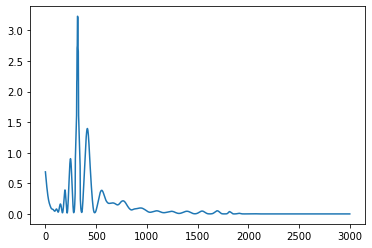

In [307]:
plt.plot(losses)
plt.show()

In [308]:
torch.save(model.state_dict(), "mlp_for_ALL.pkl") # mlp_for_Night.pkl / mlp_for_Day.pkl